# Logistic Regression From Scratch

Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

We now define the class of logistic regression in this next code block. 

The class will have a init function to initialise the class object with a few parameters

The fit function will fit the model to the training data. This will be done by implementing gradient descent. The algorithm will iteratively run using a 'for' loop for the number of iterations stated in num_iter parameter we provide. In each iteration it will use the update rule of logistic regression to do so. 

The update rule has a spearate function called update_weights where the updating rule of gradient descent is defined. the prediction y hat is calculated by the initialised weights and biases. the dw and db are calculated by their formula and then the new w and b are assigned to update to new values

We also have a compute_loss function that computes the loss for the model. This function is utilised during gradient descent to iteratively update the list with costs over each iteration. This will hence allow use to visualise the learning curve as we will see, which can be analysed to set the correct values for learning rate and iterations

In [ ]:
class Logistic_Regression():

    # declaring learning rate & number of iterations (the hyperparameters)
 
    def __init__(self, learning_rate, iter_num):
        self.learning_rate = learning_rate
        self.iter_num = iter_num
        self.losses = []  # To store losses for learning curve plot

    ''' 
    fit function to train the model with the dataset
    it first defines m and n which are the no of data points (given by num of rows in X) and the no of features (given by num of rows in X)
    then it intialises the weight vector and the bias b values to zero
    then X matrix and Y vector also get a method to be called
    '''
    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # implementing Gradient Descent by using the update rule
        #in each iteration we store the binary cross entropy loss or the log loss into loss array
        #this is done so that later the learning curve can be plotted
        #this was done so that we can easily find out roughly which values should be assigned to learning rate and iterations
        #this will be achieved by analysing where the learning curve plateaus 
        for i in range(self.iter_num):
            self.update_weights()
            loss = self.compute_loss()
            self.losses.append(loss)
            
    
    
    '''
    here we deine the update weight function which will use the weight and bias update rules to update their values 
    this will be used in gradient descent
    '''
    def update_weights(self):
        Y_hat = 1 / (1 + np.exp(-(self.X.dot(self.w) + self.b)))
        dw = (1 / self.m) * np.dot(self.X.T, (Y_hat - self.Y)) # the dot product will ensure that Xji are all multiplied and summation is taken
        db = (1 / self.m) * np.sum(Y_hat - self.Y)
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

        
    '''
    binary cross entropy loss is defined here. this will be used to compute loss and hence help in plotting learning curve
    '''
    def compute_loss(self):
        Y_hat = 1 / (1 + np.exp(-(self.X.dot(self.w) + self.b)))
        loss = (-self.Y * np.log(Y_hat) - (1 - self.Y) * np.log(1 - Y_hat)).mean()
        return loss
    
    # Sigmoid Equation & Decision Boundary
    def predict(self, X):
        Y_pred = 1 / (1 + np.exp(-(X.dot(self.w) + self.b)))
        Y_pred = np.where(Y_pred > 0.5, 1, 0)
        return Y_pred


Now we will load the training dataset

Note that if you dont have 2 separate train and test datasets but instead have a single dataset, then you can split the dataset into train and test splits. A good ratio between training examples and testing examples is around 80:20

Since I have two separate train and test datasets, I will be using them as we will now see

In [3]:
# Load the train dataset
# this will be achieved by using the pandas function read_csv
train_dataset = pd.read_csv('ds1_train.csv')
train_dataset.head()

,x_1,x_2,y
0,2.911809,60.359613,0.0
1,3.774746,344.149284,0.0
2,2.615488,178.222087,0.0
3,2.013694,15.259472,0.0
4,2.757625,66.194174,0.0


Now after loading the training dataset I need to separate the input features into a separate array and the corresponding output labels in a different array.

This can be done by using the .values method

In [4]:
# Extract the feature columns (X) and the output label column (Y)
X = train_dataset[['x_1', 'x_2']].values
Y = train_dataset['y'].values

In the above code block we have split the dataset to get the data points matrix X and the output label vector Y. It is a good idea to visualise the dataset input features with respect to each other in a plot.

This allows us to see if the scale of any input features is very high relative to some other features. If this does happen, we will normalise the features of the dataset which is a technique that changes the scale of all different feature values to a similar range of values(generally between 0 and 1)

So first let's use matplotlib to plot the input features x_1 and x_2 against each other

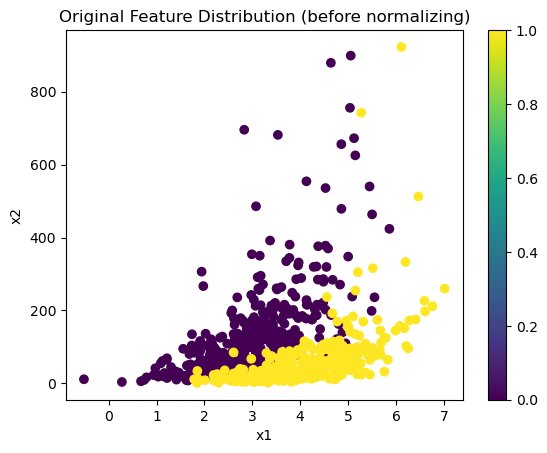

In [5]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Original Feature Distribution (before normalizing)')
plt.colorbar();

#note that the plot below is before normalisation hence the vast difference in the ranges of x1 and x2.
#this will obstruct gradient descent to work optimally. hence we conclude that normalisation is required

Now we will normalise the input features x_1 and x_2. 
There are different techniques that can be used for this:
* (x)/(x_max): this is a very simple normalisation. for every input feature x_i it will take the maximum value of the feature out of all the datapoints and then divide all the datapoints' corresponding input feature by that feature's maximum value.
* (x-x_min)/(x_max-x_min) or (x-x_mean)/(x_max-x_min): both these usually go on and do a similar thing. basically they scale down all the features between 0 and 1.
* (x-x_mean)/(sigma(x)): sigma means standard deviation of all the input feature values for a particular input feature column. This also normalises the features quite nicely.

In [6]:
# Normalize the features
# here we define the normalising function and normalise X
def normalize_features(X):
    X_normalized = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    return X_normalized
X = normalize_features(X)

#note that since X is a matrix, we can parallelise the computing for all the columns at once, which is what I have done here

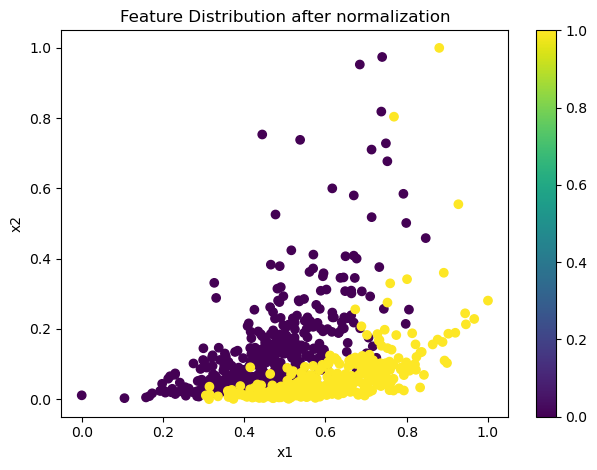

In [7]:
# Visualize the normalized feature distribution 
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Feature Distribution after normalization')
plt.colorbar()
plt.tight_layout()
plt.show()

Clearly the normalisation has worked nicely as the ranges of x1 and x2 are now in similar range of values

let's just set some values for learning rate and iterations and then analyse the learning curve to see if the model needs other values to re-fit itself

In [8]:
# Instantiate the Logistic_Regression class along with hyperparameters(parameters controlled by us and not by the algorithm)

learning_rate = 0.1 # Set learning rate
num_iterations = 10000  # Set number of iterations
model = Logistic_Regression(learning_rate, num_iterations)

let's fit the model on these hyperparameters

In [9]:
# Train the model using the fit function
#as iterations are chosen to be 1 lakh, it takes a few seconds

model.fit(X, Y)

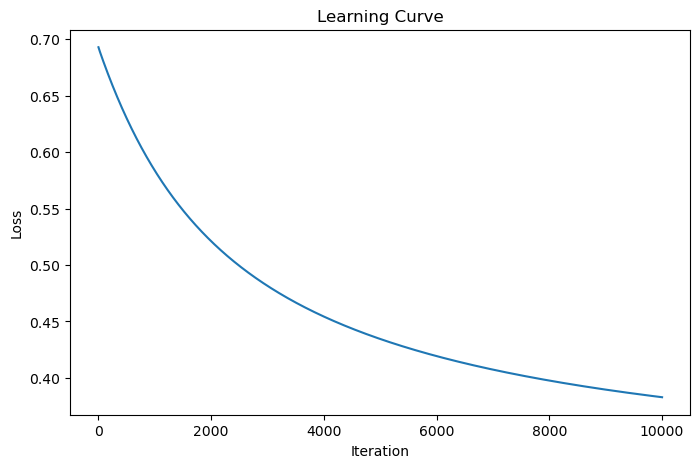

In [10]:
# Plot the learning curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_iterations + 1), model.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()

#learning curve is important to plot as it helps choose some decent values for learning rate and the iterations num

clearly the curve hasn't reached a plateau region. Hence the number of iterations need to be increased to 20 or 30 times more to ensure a plateau. But that would make the number of iterations too much and compuatation time would increase. So let's also increase the step size, ie, the learning rate too. Let's set them to 1 for learning rate and 100,000 for the number of iterations and re-plot the curve

In [11]:
learning_rate_2 = 1 # Set learning rate
num_iterations_2 = 100000  # Set number of iterations
model = Logistic_Regression(learning_rate_2, num_iterations_2)

let's now fit the model to these new values

In [12]:
model.fit(X, Y)

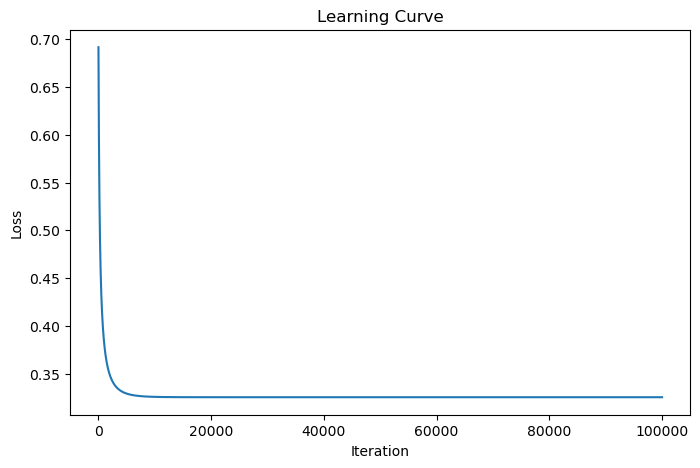

In [13]:
# Plot the new learning curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_iterations_2 + 1), model.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()

Clearly an assured plateu is achieved. The graph tells us that we can reduce the number of iterations to 20,000 with the current learning rate to plateau the cost. 

Let's leave that as an exercise for later, and now let's move on with plotting the decision boundary and checking the different metric scores of the model.

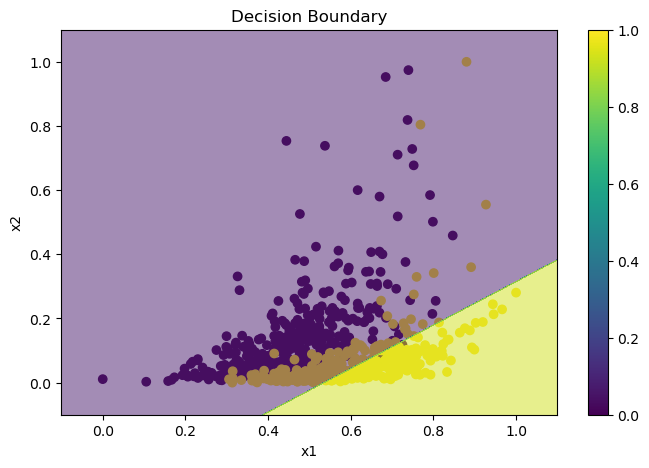

In [17]:
# we will plot and visualise the decision boundary using two plots overlapping on each other

# Plot the decision boundary
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary')
plt.colorbar()

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
grid_data = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(normalize_features(grid_data)).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5, cmap='viridis')
plt.show()

Now let's load the test dataset, split the input and output columns and then normalise for the testing.

In [18]:
# Load the test dataset 
test_dataset = pd.read_csv('ds1_test.csv')
test_dataset.head()

# Extract the feature columns (X_test) and the output label column (Y_test)
X_test = test_dataset[['x_1', 'x_2']].values
Y_test = test_dataset['y'].values

# Normalizing the testing dataset so that testng can be done smoothly 
# this is becuase the model had been trained on the normalised training dataset
X_test = normalize_features(X_test)

Let's now use the predict function of the class to store the predicted values for the input values of the test dataset

In [19]:
# Use the trained model to predict labels on the test dataset
Y_pred_test = model.predict(X_test)

Now lets move on and check the different metric scores like accuracy, precision, etc.

These are the formulae for accuracy, F1 score, precision, and recall:

1. Accuracy:
Accuracy = (True Positives + True Negatives) / Total Number of Instances

2. F1 Score:
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

3. Precision:
Precision = True Positives / (True Positives + False Positives)

4. Recall:
Recall = True Positives / (True Positives + False Negatives)

These formulae signify the following:

1. Accuracy: 
Accuracy measures the overall correctness of the logistic regression model in making predictions. It is calculated as the ratio of correctly predicted instances (True Positives + True Negatives) to the total number of instances in the dataset.

2. F1 Score:
The F1 score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall, providing a single score that represents the model's performance. It is computed using the formula: F1 Score = 2 * (Precision * Recall) / (Precision + Recall).

3. Precision:
Precision is the proportion of true positive predictions (correctly identified positive instances) out of all instances predicted as positive by the model. The formula for precision is: Precision = True Positives / (True Positives + False Positives).

4. Recall:
Recall, also known as sensitivity or true positive rate, is the proportion of true positive predictions out of all actual positive instances in the dataset. It is calculated using the formula: Recall = True Positives / (True Positives + False Negatives).

Let's code these up

In [20]:
# Calculate evaluation metrics (e.g., accuracy, precision, recall, F1-score) on the test dataset
accuracy_test = np.mean(Y_pred_test == Y_test)
precision_test = np.sum((Y_pred_test == 1) & (Y_test == 1)) / np.sum(Y_pred_test == 1)
recall_test = np.sum((Y_pred_test == 1) & (Y_test == 1)) / np.sum(Y_test == 1)
f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)

Let's now use the predict function of the class to store the predicted values for the input values of the train dataset

In [21]:
# Use the trained model to predict labels on the training dataset
Y_pred_train = model.predict(X)

Let's again calculate the metric scores but this time for the training dataset

In [22]:
# Calculate evaluation metrics on the training dataset
accuracy_train = np.mean(Y_pred_train == Y)
precision_train = np.sum((Y_pred_train == 1) & (Y == 1)) / np.sum(Y_pred_train == 1)
recall_train = np.sum((Y_pred_train == 1) & (Y == 1)) / np.sum(Y == 1)
f1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)

Let's print the performance metrics of the trained model on the training and test dataset

In [23]:
# Display evaluation metrics on both the training and test datasets
print("Training Set Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_score_train)

print("\nTest Set Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)

Training Set Metrics:
Accuracy: 0.8825
Precision: 0.8731707317073171
Recall: 0.895
F1-score: 0.8839506172839507

Test Set Metrics:
Accuracy: 0.83
Precision: 0.9230769230769231
Recall: 0.72
F1-score: 0.8089887640449438


So we can clearly see that test accuracy is 83% and train set accuracy is 88.25%

Clearly there is much room for improvement

Thinking this and also that the decision boundary's shape wasn't just set for the datapoints of the scatterplot we had, I felt that the linear boundary may not be the answer. So let's to step up the algorithm by coding a polynomial logistic regression code.

Let's try a 2 degree decision boundary logistic regression algorithm.

It is built on the same framework of this code with modifications, and so most of the code is slight changes due to use of feature engineering.

We may see a decent increase in accuracy after this new algorithm gets applied.

Lets move on to the code

In [24]:
# Extract the feature columns (X) and the output label column (Y) from the dataset from scratch once again
X = train_dataset[['x_1', 'x_2']].values
Y = train_dataset['y'].values

In [25]:
# Feature engineering - adding 2-degree polynomial features
# this is done by utilising numpy's array concatenation and array slicing
# we will concatenate the feature columns x_1 and x_2 as it is by concatenating the X array.
# then x_1 squared term is added as a column by using array slicing as: X[:,0]**2
# similarly we concatenate a column for x_2 squared features
# then we concatenate a column x_1*x_2
# so we have a new input feature matrix with the two 1 degree terms and the 3 possible 2 degree terms
X_poly = np.c_[X, X[:, 0]**2, X[:, 1]**2, X[:, 0] * X[:, 1]]

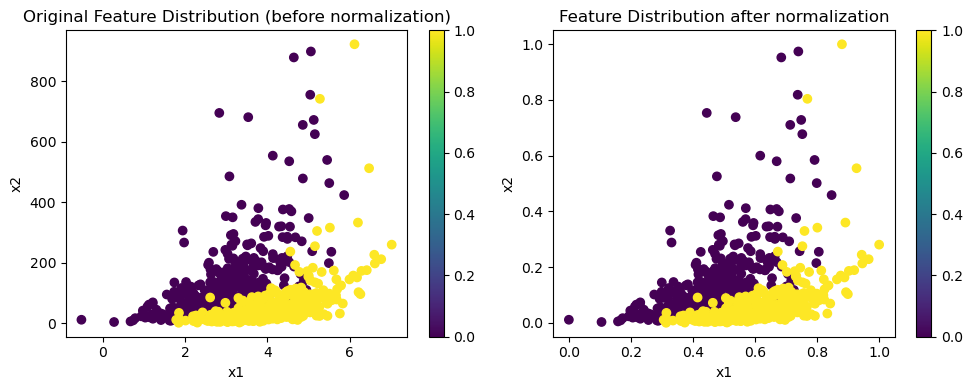

In [26]:
#plotting the original feature distribution before normalisation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_poly[:, 0], X_poly[:, 1], c=Y, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Original Feature Distribution (before normalization)')
plt.colorbar()

# Normalize the features of this new set of feature X_poly
X_poly = normalize_features(X_poly)

# Visualize the normalized feature distribution
plt.subplot(1, 2, 2)
plt.scatter(X_poly[:, 0], X_poly[:, 1], c=Y, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Feature Distribution after normalization')
plt.colorbar()
plt.tight_layout()
plt.show()

# note that I've only shown the effect of normalisation on 2 input columns as the graph is 2d and can only show the normalisation effect on 2 features at once only
# the same normalisation has been applied to the higher degree terms too
# this means now we're ready to train the model and go further

In [27]:
# Instantiate the Logistic_Regression class along with hyperparameters
learning_rate = 1  # Set learning rate
num_iterations = 200000  # Set number of iterations
model = Logistic_Regression(learning_rate, num_iterations)

# Train the model using the fit function
# Note that this time X_poly is being used to fit
# Hence number of weights will be more than before 
# due to this new number of weights and nature of these new higher degree features, all the code of the previous section is being reused to re-evaluate this new model
model.fit(X_poly, Y)

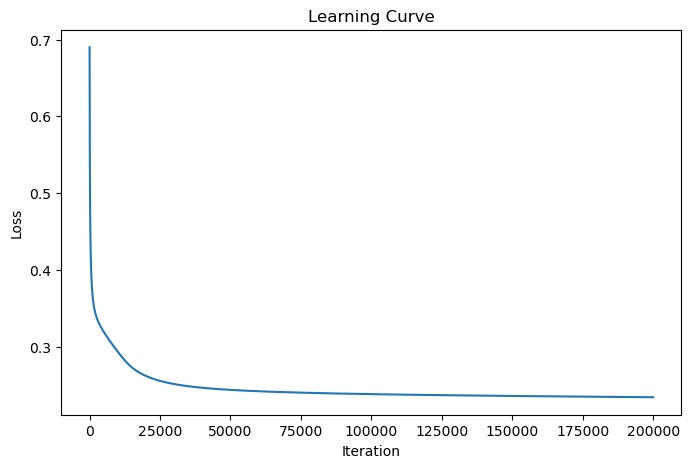

In [28]:
# Plot the new learning curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_iterations + 1), model.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()


Clearly the curve has come to a plataeu. So, the gradient descent has converged

Now, let's again load the test data points and check the performance metrics

In [29]:
# Loading the test dataset has already been done in the previous section
# Extract the feature columns (X_test) and the output label column (Y_test)
X_test = test_dataset[['x_1', 'x_2']].values
Y_test = test_dataset['y'].values

# Feature engineering - adding 2-degree polynomial features to the test data
X_poly_test = np.c_[X_test, X_test[:, 0]**2, X_test[:, 1]**2, X_test[:, 0] * X_test[:, 1]]
X_poly_test = normalize_features(X_poly_test)

# Use the trained model to predict labels on the test dataset
Y_pred_test = model.predict(X_poly_test)

# Calculate evaluation metrics on the test dataset for this 2 degree boundary logistic regresion
accuracy_test = np.mean(Y_pred_test == Y_test)
precision_test = np.sum((Y_pred_test == 1) & (Y_test == 1)) / np.sum(Y_pred_test == 1)
recall_test = np.sum((Y_pred_test == 1) & (Y_test == 1)) / np.sum(Y_test == 1)
f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)

# Use the trained model to predict labels on the training dataset
Y_pred_train = model.predict(X_poly)

# Calculate evaluation metrics on the training dataset for this 2 degree boundary logistic regresion
accuracy_train = np.mean(Y_pred_train == Y)
precision_train = np.sum((Y_pred_train == 1) & (Y == 1)) / np.sum(Y_pred_train == 1)
recall_train = np.sum((Y_pred_train == 1) & (Y == 1)) / np.sum(Y == 1)
f1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)

# Display evaluation metrics on both the training and test datasets
print("Training Set Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_score_train)

print("\nTest Set Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)

Training Set Metrics:
Accuracy: 0.90875
Precision: 0.9077306733167082
Recall: 0.91
F1-score: 0.9088639200998752

Test Set Metrics:
Accuracy: 0.86
Precision: 0.8103448275862069
Recall: 0.94
F1-score: 0.8703703703703703


Clearly the accuracy has increased by changing the decision boundary from linear to quadratic

Earlier the test set accuracy was 83% and now it is 86%. also the other test set metrics have improved. Even the training set metrics have increased, with the accuracy jumping from 88% to almost 91%

In a similar manner one can experiment with higher degree models. But as degree increases overfitting may occur. So, regularisation and hyperparameter tuning will become essential. In the next jupyter notebook we will discuss about this and see how it helps increase the accuracy of the model by making it generalise in order to predict new data better.

Now let's plot the training data with dots and the test data points with crosses and then plot the decision boundary of this new model. 

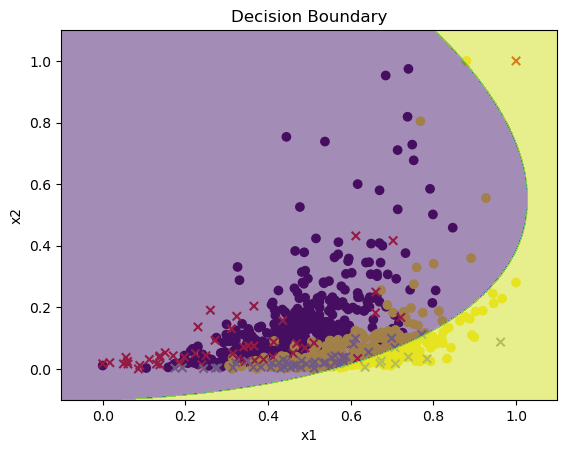

In [35]:
# Plotting the decision boundary using same technique as before
plt.figure()
plt.scatter(X_poly[:, 0], X_poly[:, 1], c=Y, cmap='viridis')
plt.scatter(X_poly_test[:,0],X_poly_test[:,1],c=Y_test,marker='x',cmap='Set1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary')

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X_poly[:, 0].min() - 0.1, X_poly[:, 0].max() + 0.1
y_min, y_max = X_poly[:, 1].min() - 0.1, X_poly[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
grid_data = np.c_[xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2, xx.ravel() * yy.ravel()]
grid_data = normalize_features(grid_data)
Z = model.predict(grid_data).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5, cmap='viridis')
plt.show()

# Thank you

---